In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install contractions
import seaborn as sns
import numpy as np
import pandas as pd
import string
import re
import nltk

In [ ]:
import subprocess
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
import contractions as ctrs

In [ ]:
# here, I load the bank.csv dataset in a dataframe
import pandas as pd
path="/content/drive/My Drive/content1/banglishTTCC.csv"

df = pd.read_csv(path)

In [ ]:
import pandas as pd
path="/content/drive/My Drive/content1/banglishAmader.csv"

d1 = pd.read_csv(path)

In [ ]:
import pandas as pd
path="/content/drive/My Drive/content1/BanglishComment.csv"

d2 = pd.read_csv(path)

In [ ]:
print(d1.shape)
d1.head(5)

(1062, 5)


,id,text,positive,toxic,neutral
0,1,ai writing ta onek shundor,1,0,0
1,2,makeup ta baje hoise,0,1,0
2,3,na bujhe ultapalta na likhleo paro,0,1,0
3,4,aager cheye mota hoiso,0,1,0
4,5,drawing a aro improve kora dorkar,0,1,0


In [ ]:
print(d2.shape)
d2.head(5)

(4999, 5)


,id,text,positive,negative,neutral
0,0,bl theke apnader sathe sorasori kotha bolbo p...,0,0,1
1,1,Achcha amar gp sim ta off na on ei ta dekar c...,0,0,1
2,2,5 tk 500 mb dial *5000*150# offer ta koto din...,0,0,1
3,3,gp te 78 takar recharge ki hobe,0,0,1
4,4,gp te advance balance die mb kina jai na kn? ...,0,1,0


# EDA

In [ ]:
#here, I have shown 10 columns so that I can understand how the dataset is
df.head(5)

,id,text,positive,toxic,neutral
0,0,bl theke apnader sathe sorasori kotha bolbo p...,0,0,1
1,1,Achcha amar gp sim ta off na on ei ta dekar c...,0,0,1
2,2,5 tk 500 mb dial *5000*150# offer ta koto din...,0,0,1
3,3,gp te 78 takar recharge ki hobe,0,0,1
4,4,gp te advance balance die mb kina jai na kn? ...,0,1,0


In [ ]:
# shape of the df
df.shape

(6188, 5)

In [ ]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

In [ ]:
print(df.shape)
df.head(5)

(6188, 5)


,id,text,positive,toxic,neutral
4805,4805,Onno country theke ki tk ashar system ache?,0,0,1
4519,4519,Jatisongho keno santirokhi bahini mayanmare p...,0,1,0
4903,4903,apu tmi ato cute kno??????????,0,0,1
4462,4462,Sishu kale mayer theke gorur dudh beshi khei ...,0,1,0
5663,5666,Baal chal kajkam,0,1,0


In [ ]:
# Here, I find out the the type and the
#other info of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6188 entries, 4805 to 5927
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6188 non-null   int64 
 1   text      6188 non-null   object
 2   positive  6188 non-null   int64 
 3   toxic     6188 non-null   int64 
 4   neutral   6188 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 290.1+ KB


In [ ]:
# statistical description of the df
df.describe(include='all')

,id,text,positive,toxic,neutral
count,6188.000000,6188,6188.000000,6188.000000,6188.000000
unique,NaN,6019,NaN,NaN,NaN
top,NaN,ijjot tula tula koira dise halar putera,NaN,NaN,NaN
freq,NaN,17,NaN,NaN,NaN
mean,3095.248384,NaN,0.031189,0.334842,0.633969
std,1793.490183,NaN,0.173843,0.471973,0.481757
min,0.000000,NaN,0.000000,0.000000,0.000000
25%,1546.750000,NaN,0.000000,0.000000,0.000000
50%,3093.500000,NaN,0.000000,0.000000,1.000000
75%,4640.250000,NaN,0.000000,1.000000,1.000000


In [ ]:
#here, I find out if there is any missing values or not
df.isnull().sum()

id          0
text        0
positive    0
toxic       0
neutral     0
dtype: int64

# As there is no missing values I don't need to deal with that problem

In [ ]:
dff=df

In [ ]:
y=[None]*6188
dff['y']=y

In [ ]:
dff['y'][dff['positive']==1] = 'Positive'
dff['y'][dff['toxic']==1]= 'Toxic'
dff['y'][dff['neutral']==1]= 'Neutral'

<ipython-input-854-a11b29a178ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['y'][dff['positive']==1] = 'Positive'
<ipython-input-854-a11b29a178ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['y'][dff['toxic']==1]= 'Toxic'
<ipython-input-854-a11b29a178ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['y'][dff['neutral']==1]= 'Neutral'


In [ ]:
dff.tail(10)

,id,text,positive,toxic,neutral,y
1699,1699,ai mb dia kicu dwnld hoy na ba kono link ar n...,0,1,0,Toxic
3727,3727,Ore to allah sabdan korse ?ekhono somoy ase v...,0,1,0,Toxic
496,496,49 tk r offer ta ki off hoye gece??,0,0,1,Neutral
4194,4194,bkash a tk vul kora pathala upai asa ki ???,0,0,1,Neutral
1412,1412,5 takai 500 mb amar nember a message ase na k...,0,0,1,Neutral
5212,5000,ki khrp mentality oder,0,1,0,Toxic
848,848,but ekhn eta deactive hoye ase eka eka..,0,0,1,Neutral
5814,6001,Ami tmr jonne ke ke korbo,0,0,1,Neutral
931,931,lense kit ar dam koto ar kothay pete pari?Ata...,0,0,1,Neutral
5927,6001,Tel mar halare,0,1,0,Toxic


In [ ]:
dff.y.value_counts()

Neutral     3923
Toxic       2072
Positive     193
Name: y, dtype: int64

In [ ]:
#ploting pie chart for showing the Percentage of types of comments
m=pd.DataFrame({'out': ['Positive', 'Neutral', 'Toxic'],
                   'counts': [193, 3923, 2072]})
m.set_index('out', inplace=True)

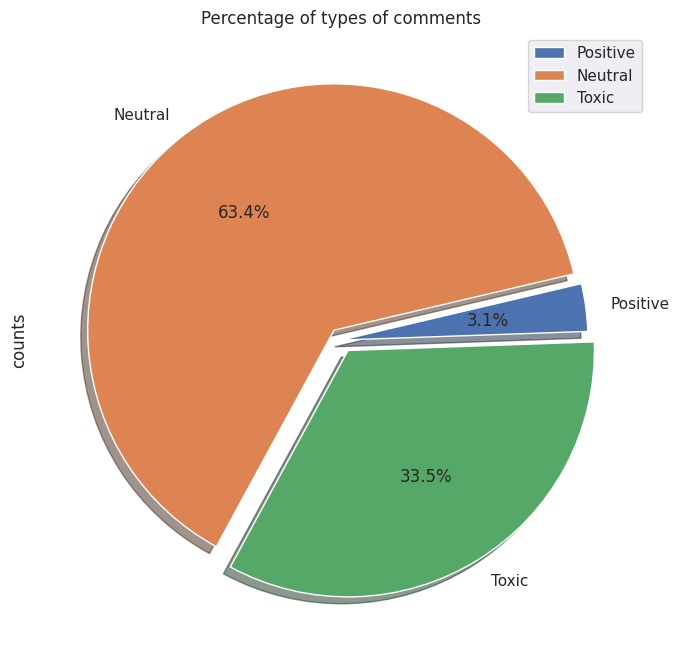

In [ ]:
plot = m.plot.pie(y='counts', title="Percentage of types of comments", legend=True, shadow=True,
                   autopct='%1.1f%%', explode=(0, 0.05, 0.05), startangle=2, figsize=(8, 8))

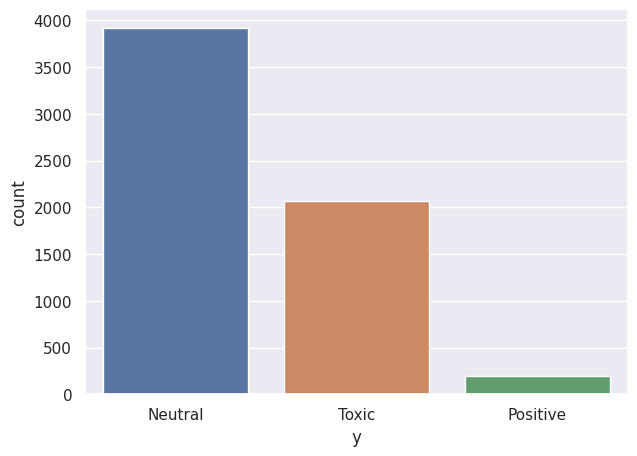

In [ ]:
# visualizing the distribution of target variable
sns.set(rc={'figure.figsize':(7,5)})
axis=sns.countplot(x='y', data = dff)

In [ ]:
#I am showing the terget variable's value count (count the rows in different classes)
df.toxic.value_counts()

0    4116
1    2072
Name: toxic, dtype: int64

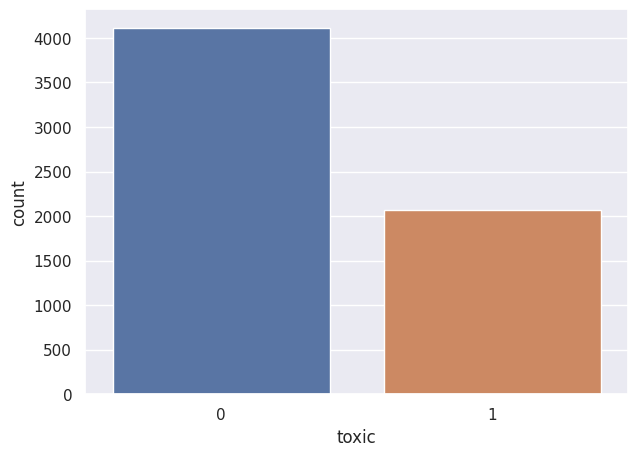

In [ ]:
# visualizing the distribution of target variable
sns.set(rc={'figure.figsize':(7,5)})
axis=sns.countplot(x='toxic', data = df)

In [ ]:
#I am showing the terget variable's value count (count the rows in different classes)
df.positive.value_counts()

0    5995
1     193
Name: positive, dtype: int64

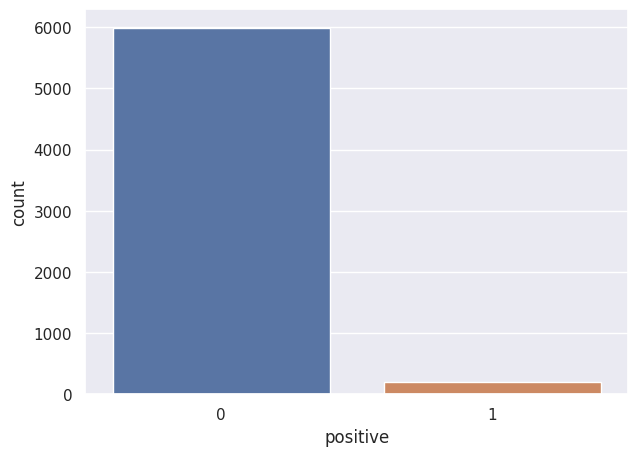

In [ ]:
# visualizing the distribution of target variable
sns.set(rc={'figure.figsize':(7,5)})
axis=sns.countplot(x='positive', data = df)

In [ ]:
#I am showing the terget variable's value count (count the rows in different classes)
df.neutral.value_counts()

1    3923
0    2265
Name: neutral, dtype: int64

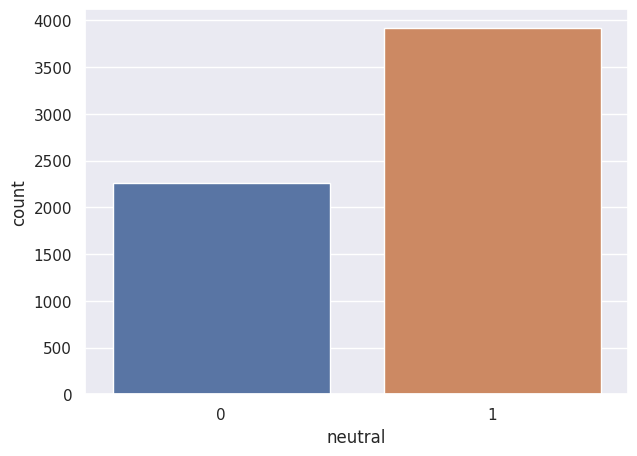

In [ ]:
# visualizing the distribution of target variable
sns.set(rc={'figure.figsize':(7,5)})
axis=sns.countplot(x='neutral', data = df)

# From those visualization we can reached to the realization that it is good to analyze that either the comment is toxic or not (binary classification)

In [ ]:
#So, we are keeping the 'y_toxic' as a tagtet class and the remaining 'positive' and 'neutral' are goring to be droped
df1=df
y_toxic=[None]*6188
df1['y_toxic']=y_toxic
dff['y'][dff['y']=='Positive'] = 0
dff['y'][dff['y']=='Toxic']= 1
dff['y'][dff['y']=='Neutral']= 0
df1['y_toxic']=dff['y']
df1.head(5)

<ipython-input-866-ed4f57e12a33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['y'][dff['y']=='Positive'] = 0
<ipython-input-866-ed4f57e12a33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['y'][dff['y']=='Toxic']= 1
<ipython-input-866-ed4f57e12a33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['y'][dff['y']=='Neutral']= 0


,id,text,positive,toxic,neutral,y,y_toxic
4805,4805,Onno country theke ki tk ashar system ache?,0,0,1,0,0
4519,4519,Jatisongho keno santirokhi bahini mayanmare p...,0,1,0,1,1
4903,4903,apu tmi ato cute kno??????????,0,0,1,0,0
4462,4462,Sishu kale mayer theke gorur dudh beshi khei ...,0,1,0,1,1
5663,5666,Baal chal kajkam,0,1,0,1,1


In [ ]:
#now lets see the shape of the dataset
df1.shape

(6188, 7)

In [ ]:
df1=df1.drop(columns=['id','toxic', 'positive', 'neutral', 'y'])

In [ ]:
df1.head(10)

,text,y_toxic
4805,Onno country theke ki tk ashar system ache?,0
4519,Jatisongho keno santirokhi bahini mayanmare p...,1
4903,apu tmi ato cute kno??????????,0
4462,Sishu kale mayer theke gorur dudh beshi khei ...,1
5663,Baal chal kajkam,1
5296,deklei ghinna lge,1
1577,akon ki are give kora jai na plexiplan thaka,0
3607,ei number theke disturb kore .,0
2956,jessore ta kobe telekast korbe...???,0
2489,Ora jodi nirdus take tahole sahajo kora dorka...,0


# here, "toxic" = '1' and "non-toxic" = "0"
where, non-toxic= positive + neutral

In [ ]:
#I am showing the terget variable, 'y_toxic's value count (count the rows in different classes)
df1.y_toxic.value_counts()

0    4116
1    2072
Name: y_toxic, dtype: int64

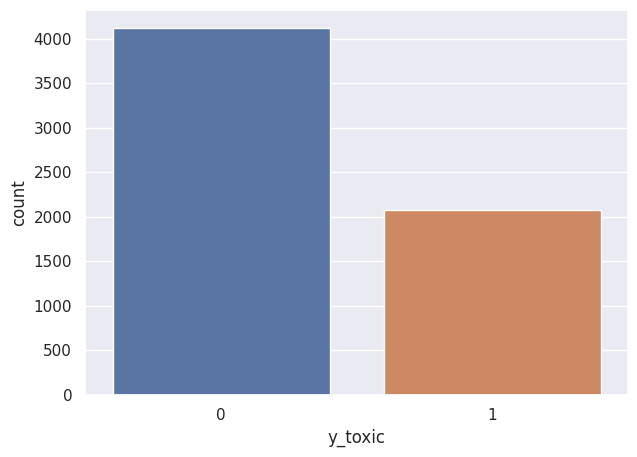

In [ ]:
# visualizing the distribution of target variable
sns.set(rc={'figure.figsize':(7,5)})
axis=sns.countplot(x='y_toxic', data = df1)

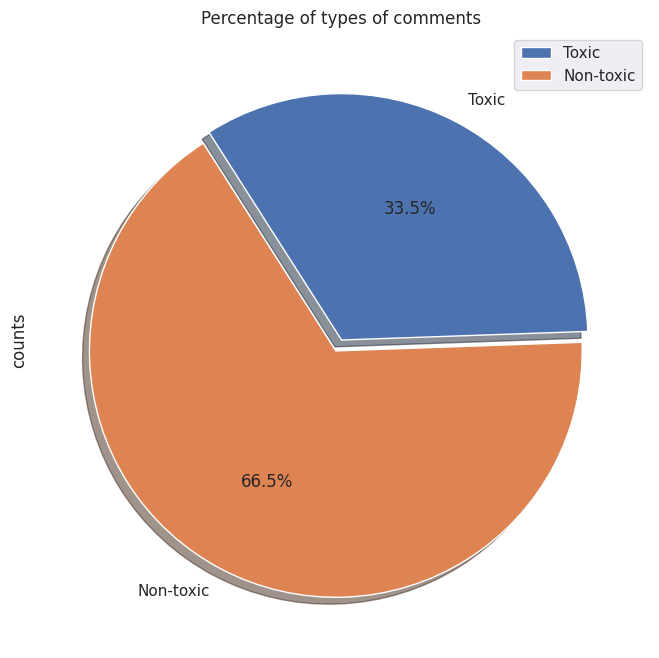

In [ ]:
#ploting pie chart for showing the Percentage of types of comments
n=pd.DataFrame({'out': ['Toxic', 'Non-toxic'],
                   'counts': [2072,4116]})
n.set_index('out', inplace=True)
plot = n.plot.pie(y='counts', title="Percentage of types of comments", legend=True, shadow=True,
                   autopct='%1.1f%%', explode=(0, 0.05), startangle=2, figsize=(8, 8))

# Text Data preprocessing

# (1) Filtration

In [ ]:
#filtering the data
#removing email, url, html, puntuations, ascii, emoji etc.
#here, we have written some functions for


def filt_URLS(text):
    return re.sub(r'https:?//\S+|www\.',"",text)
def filt_emails(text):
    return re.sub(r'^[a-zA-Z0-9_-]+[@][a-zA-Z]+[.].+',"",text)
def filt_html(text):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});',"",text)
def filt_punctuations(text):
    k = string.punctuation
    return text.translate(str.maketrans(' ',' ',k) )
def filt_emojis(text):
    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def filt_non_ascii(text):
    stripped = (c for c in text if 0 < ord(c) < 127)
    return ''.join(stripped)

def filt_chars(text):
    return re.sub(r'\n'," ",text)

In [ ]:
#here, we have applied those functions
df1['text'] = df1['text'].apply(lambda x:x.lower())
df1['text'] = df1['text'].apply(lambda x:ctrs.fix(x))
df1['text'] = df1['text'].apply(lambda x:filt_URLS(x))
df1['text'] = df1['text'].apply(lambda x:filt_emails(x))
df1['text'] = df1['text'].apply(lambda x:filt_html(x))
df1['text'] = df1['text'].apply(lambda x:filt_punctuations(x))
df1['text'] = df1['text'].apply(lambda x:filt_emojis(x))
df1['text'] = df1['text'].apply(lambda x:filt_non_ascii(x))
df1['text'] = df1['text'].apply(lambda x:filt_chars(x))

In [ ]:
df1.head(10)

,text,y_toxic
4805,onno country theke ki tk ashar system ache,0
4519,jatisongho keno santirokhi bahini mayanmare p...,1
4903,apu tmi ato cute kno,0
4462,sishu kale mayer theke gorur dudh beshi khei ...,1
5663,baal chal kajkam,1
5296,deklei ghinna lge,1
1577,akon ki are give kora jai na plexiplan thaka,0
3607,ei number theke disturb kore,0
2956,jessore ta kobe telekast korbe,0
2489,ora jodi nirdus take tahole sahajo kora dorka...,0


We can at least observe that all the puntuation marks have been removed  

# (2) Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words=150, oov_token="<oov>")

In [ ]:
token.fit_on_texts(df1['text'])

In [ ]:
word_index=token.word_index

In [ ]:
sequence=token.texts_to_sequences(df1['text'])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded=pad_sequences(sequence, padding='post', truncating='post')

In [ ]:
print(word_index)

{'<oov>': 1, 'ki': 2, 'na': 3, 'ta': 4, 'er': 5, 'offer': 6, 'ami': 7, 'sim': 8, 'a': 9, 'e': 10, 'kono': 11, 'kore': 12, 'to': 13, 'r': 14, 'amar': 15, 'taka': 16, 'ar': 17, 'kora': 18, 'korte': 19, 'valo': 20, 'tk': 21, 'jonno': 22, 'gp': 23, 'ei': 24, 'ti': 25, 'hobe': 26, 'koto': 27, 'ase': 28, 'theke': 29, 'mb': 30, 'amr': 31, 'amader': 32, 'din': 33, 'jabe': 34, 'te': 35, 'ke': 36, 'k': 37, 'vai': 38, 'hoy': 39, 'ai': 40, 'bondho': 41, 'bkash': 42, 'kotha': 43, 'apnar': 44, 'korbo': 45, 'o': 46, 'sob': 47, 'akta': 48, 'pabo': 49, 'onek': 50, 'number': 51, 'korar': 52, 'plz': 53, 'jay': 54, 'jodi': 55, 'nai': 56, '1': 57, 'diye': 58, 'korle': 59, 'moto': 60, 'recharge': 61, 'ache': 62, 'hoye': 63, 'akhon': 64, 'apu': 65, 'naki': 66, 'je': 67, 'kno': 68, 'tomar': 69, 'tar': 70, 'jai': 71, 'tahole': 72, 'por': 73, 'nite': 74, 'lage': 75, 'use': 76, 'banglalink': 77, 'keno': 78, 'der': 79, 'sathe': 80, 'ato': 81, 'tai': 82, 'ekta': 83, 'jante': 84, 'account': 85, 'khub': 86, 'bar': 8

In [ ]:
print(sequence)

[[134, 1, 29, 2, 21, 1, 1, 62], [1, 78, 1, 1, 1, 1, 3, 1, 1, 1, 3], [65, 1, 81, 1, 68], [1, 1, 1, 29, 1, 1, 1, 1, 1, 1, 82, 1, 1, 36, 1, 12, 1, 1, 82, 1, 1, 1, 1, 123, 82, 115, 10, 1, 12, 1, 38, 7, 11, 1, 29, 1, 3, 1, 29, 1, 98, 7, 15, 1, 36, 1, 70, 73, 1, 7, 15, 1, 1, 1, 1, 1, 117], [1, 1, 1], [1, 1, 1], [1, 2, 1, 1, 18, 71, 3, 1, 1], [24, 51, 29, 1, 12], [1, 4, 1, 1, 1], [1, 55, 1, 1, 72, 1, 18, 1, 1, 1, 1, 1], [1, 4, 1, 12, 1, 1, 1], [1, 17, 71, 1, 1, 29, 13, 1, 56], [1, 21, 10, 1, 1, 76, 5, 22, 1, 1, 135, 39, 3, 66], [1, 15, 1, 5, 1, 1, 3, 1], [1, 4, 20, 12, 1, 1, 1, 1, 13, 82], [1, 13, 1, 10, 1, 1, 7, 14, 2, 1, 1], [1, 5, 1, 1, 1, 29, 1, 101, 1, 18, 54], [1, 1, 1, 1, 1, 86, 1, 1], [1, 13, 1, 1, 1, 43, 1, 1, 13, 1, 149, 19, 1, 1, 1, 1, 1, 1, 1], [81, 127, 1, 1, 1, 1, 3], [38, 15, 1, 41, 1, 17, 1, 2, 3, 2, 1, 1], [65, 1, 101, 1, 1], [1, 1, 66, 134, 1], [69, 1, 5, 1, 1], [1, 3, 1, 1, 1, 54, 3], [7, 95, 39, 1, 1], [89, 8, 5, 22, 30, 1, 11, 1, 99, 2, 3], [1, 1, 66, 1, 1], [65, 1, 47, 1

In [ ]:
print(padded)

[[134   1  29 ...   0   0   0]
 [  1  78   1 ...   0   0   0]
 [ 65   1  81 ...   0   0   0]
 ...
 [  7   1   1 ...   0   0   0]
 [  1   1  17 ...   0   0   0]
 [  1   1   1 ...   0   0   0]]


In [ ]:
from nltk.tokenize import word_tokenize
df1["token_form"] = df1['text'].apply(word_tokenize)

In [ ]:
df1.head(10)

,text,y_toxic,token_form
4805,onno country theke ki tk ashar system ache,0,"[onno, country, theke, ki, tk, ashar, system, ..."
4519,jatisongho keno santirokhi bahini mayanmare p...,1,"[jatisongho, keno, santirokhi, bahini, mayanma..."
4903,apu tmi ato cute kno,0,"[apu, tmi, ato, cute, kno]"
4462,sishu kale mayer theke gorur dudh beshi khei ...,1,"[sishu, kale, mayer, theke, gorur, dudh, beshi..."
5663,baal chal kajkam,1,"[baal, chal, kajkam]"
5296,deklei ghinna lge,1,"[deklei, ghinna, lge]"
1577,akon ki are give kora jai na plexiplan thaka,0,"[akon, ki, are, give, kora, jai, na, plexiplan..."
3607,ei number theke disturb kore,0,"[ei, number, theke, disturb, kore]"
2956,jessore ta kobe telekast korbe,0,"[jessore, ta, kobe, telekast, korbe]"
2489,ora jodi nirdus take tahole sahajo kora dorka...,0,"[ora, jodi, nirdus, take, tahole, sahajo, kora..."


# Showing word frequency

In [ ]:
df1.text.str.split(expand=True).stack().value_counts()[:20]

ki       1769
na       1167
ta        929
er        842
offer     805
ami       770
sim       737
a         717
e         613
kono      565
kore      557
to        463
r         459
amar      457
taka      436
ar        430
kora      388
korte     381
valo      370
tk        360
dtype: int64

In [ ]:
n=df1.text.str.split(expand=True).stack().value_counts()[:50]
n=n.rename_axis('word')
n=n.reset_index(name='Frq')

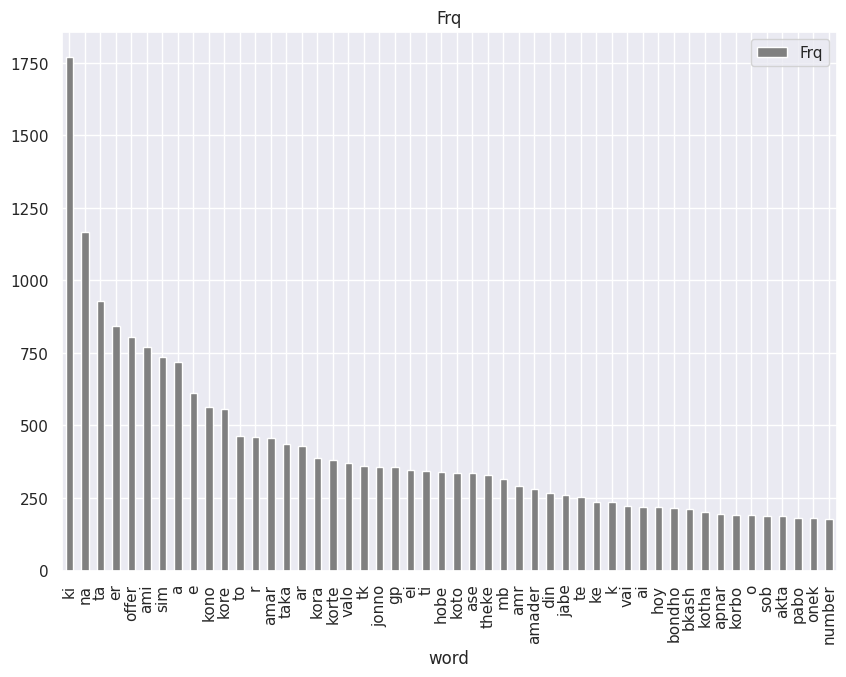

In [ ]:
n.plot(kind='bar',x='word', y='Frq',grid=True,subplots=True,sharex=True,color='gray', figsize=(10,7))
plt.show()

# (3) Stop-Word removing

(using the library for english as there is no library for Banglish)

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words())
df1['SWL_text'] = df1['token_form'].apply(lambda x:[word for word in x if word not in stop])

In [ ]:
df1.head(10)

,text,y_toxic,token_form,SWL_text
4805,onno country theke ki tk ashar system ache,0,"[onno, country, theke, ki, tk, ashar, system, ...","[onno, country, theke, tk, ashar, system, ache]"
4519,jatisongho keno santirokhi bahini mayanmare p...,1,"[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma..."
4903,apu tmi ato cute kno,0,"[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]"
4462,sishu kale mayer theke gorur dudh beshi khei ...,1,"[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi..."
5663,baal chal kajkam,1,"[baal, chal, kajkam]","[baal, kajkam]"
5296,deklei ghinna lge,1,"[deklei, ghinna, lge]","[deklei, ghinna, lge]"
1577,akon ki are give kora jai na plexiplan thaka,0,"[akon, ki, are, give, kora, jai, na, plexiplan...","[akon, give, kora, jai, plexiplan, thaka]"
3607,ei number theke disturb kore,0,"[ei, number, theke, disturb, kore]","[number, theke, disturb, kore]"
2956,jessore ta kobe telekast korbe,0,"[jessore, ta, kobe, telekast, korbe]","[jessore, kobe, telekast, korbe]"
2489,ora jodi nirdus take tahole sahajo kora dorka...,0,"[ora, jodi, nirdus, take, tahole, sahajo, kora...","[ora, jodi, nirdus, tahole, sahajo, kora, dork..."


# (4)Steamming

(using 2 different processes)

In [ ]:
def p_stemmer(text):
    p_stem = nltk.PorterStemmer()
    stems = [p_stem.stem(i) for i in text]
    return stems

def l_stemmer(text):
    l_stem = nltk.LancasterStemmer()
    stems = [l_stem.stem(i) for i in text]
    return stems

In [ ]:
df1['p_stem']= df1['SWL_text'].apply(lambda x:p_stemmer(x))

In [ ]:
df1.head(10)

,text,y_toxic,token_form,SWL_text,p_stem
4805,onno country theke ki tk ashar system ache,0,"[onno, country, theke, ki, tk, ashar, system, ...","[onno, country, theke, tk, ashar, system, ache]","[onno, countri, theke, tk, ashar, system, ach]"
4519,jatisongho keno santirokhi bahini mayanmare p...,1,"[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma..."
4903,apu tmi ato cute kno,0,"[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]"
4462,sishu kale mayer theke gorur dudh beshi khei ...,1,"[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi..."
5663,baal chal kajkam,1,"[baal, chal, kajkam]","[baal, kajkam]","[baal, kajkam]"
5296,deklei ghinna lge,1,"[deklei, ghinna, lge]","[deklei, ghinna, lge]","[deklei, ghinna, lge]"
1577,akon ki are give kora jai na plexiplan thaka,0,"[akon, ki, are, give, kora, jai, na, plexiplan...","[akon, give, kora, jai, plexiplan, thaka]","[akon, give, kora, jai, plexiplan, thaka]"
3607,ei number theke disturb kore,0,"[ei, number, theke, disturb, kore]","[number, theke, disturb, kore]","[number, theke, disturb, kore]"
2956,jessore ta kobe telekast korbe,0,"[jessore, ta, kobe, telekast, korbe]","[jessore, kobe, telekast, korbe]","[jessor, kobe, telekast, korb]"
2489,ora jodi nirdus take tahole sahajo kora dorka...,0,"[ora, jodi, nirdus, take, tahole, sahajo, kora...","[ora, jodi, nirdus, tahole, sahajo, kora, dork...","[ora, jodi, nirdu, tahol, sahajo, kora, dorkar..."


# (5)Lemmatization

In [ ]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):

    lemma = [lemmatizer.lemmatize(word) for word in text]
    return lemma

lemmatization for p_steam

In [ ]:
df1['lemma1'] = df1['p_stem'].apply(lambda x:lemmatize_word(x))

Lemmatization for l_stem

In [ ]:
df1.head(5)

,text,y_toxic,token_form,SWL_text,p_stem,lemma1
4805,onno country theke ki tk ashar system ache,0,"[onno, country, theke, ki, tk, ashar, system, ...","[onno, country, theke, tk, ashar, system, ache]","[onno, countri, theke, tk, ashar, system, ach]","[onno, countri, theke, tk, ashar, system, ach]"
4519,jatisongho keno santirokhi bahini mayanmare p...,1,"[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma..."
4903,apu tmi ato cute kno,0,"[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]"
4462,sishu kale mayer theke gorur dudh beshi khei ...,1,"[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi..."
5663,baal chal kajkam,1,"[baal, chal, kajkam]","[baal, kajkam]","[baal, kajkam]","[baal, kajkam]"


In [ ]:
df1['lemma_text'] = [' '.join(map(str, l)) for l in df1['lemma1']]

In [ ]:
df1.head()

,text,y_toxic,token_form,SWL_text,p_stem,lemma1,lemma_text
4805,onno country theke ki tk ashar system ache,0,"[onno, country, theke, ki, tk, ashar, system, ...","[onno, country, theke, tk, ashar, system, ache]","[onno, countri, theke, tk, ashar, system, ach]","[onno, countri, theke, tk, ashar, system, ach]",onno countri theke tk ashar system ach
4519,jatisongho keno santirokhi bahini mayanmare p...,1,"[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma...","[jatisongho, keno, santirokhi, bahini, mayanma...",jatisongho keno santirokhi bahini mayanmar pat...
4903,apu tmi ato cute kno,0,"[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]","[apu, tmi, ato, cute, kno]",apu tmi ato cute kno
4462,sishu kale mayer theke gorur dudh beshi khei ...,1,"[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi...","[sishu, kale, mayer, theke, gorur, dudh, beshi...",sishu kale mayer theke gorur dudh beshi khei b...
5663,baal chal kajkam,1,"[baal, chal, kajkam]","[baal, kajkam]","[baal, kajkam]","[baal, kajkam]",baal kajkam


# (6)Spliting Dataset

In [ ]:
# Initialize an empty list
labels=[]

# Loop through the DataFrame and append each text to the list
for index, row in df1.iterrows():
    labels.append(row['y_toxic'])

print(labels)
print(len(labels))

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

In [ ]:
#train_sentences=text_list[1501:]
#test_sentences=text_list[:1500]
#train_labels=labels[1501:]
#test_labels=labels[:1500]

label=[[item] for item in labels]
list_of_labels=np.array(label)

tr_label=list_of_labels[1501:]
ts_label=list_of_labels[:1501]


print(list_of_labels)
print(len(tr_label))
print(len(ts_label))


[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]
4687
1501


In [ ]:
tokenizer=Tokenizer(num_words=68, oov_token="<oov>")
#tokenizer.fit_on_texts(train_sentences)
tokenizer.fit_on_texts(df1['lemma_text'])
word_index=tokenizer.word_index

In [ ]:
train_sequences=tokenizer.texts_to_sequences(df1['lemma_text'][1501:])
train_padded=pad_sequences(train_sequences, maxlen=68, padding='post', truncating='post' )

test_sequences=tokenizer.texts_to_sequences(df1['lemma_text'][:1501])
test_padded=pad_sequences(test_sequences, maxlen=68, padding='post', truncating='post' )

In [ ]:
print(train_padded)
print(len(train_padded))

[[ 1 10  1 ...  0  0  0]
 [ 1  7  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 ...
 [ 1  1 27 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 [ 1  1  0 ...  0  0  0]]
4687


## (9) Models

I) SVM

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
svc_model = SVC(kernel='poly')
svc_model.fit(train_padded, tr_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
test_prediction1 = svc_model.predict(test_padded)
accuracy = accuracy_score(ts_label, test_prediction1)
print("SVC Accuracy: {:.2f}%".format(accuracy * 100))

SVC Accuracy: 65.82%


**II**) Naive Bayes (NB)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Train and Evaluate Models Using TF-IDF
modelNB = MultinomialNB()
modelNB.fit(train_padded, tr_label)


test_prediction2 = modelNB.predict(test_padded)
accuracy = accuracy_score(ts_label, test_prediction2)
print("NB Accuracy: {:.2f}%".format(accuracy * 100))

NB Accuracy: 61.96%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


III) Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg_model = LogisticRegression()
log_reg_model.fit(train_padded, tr_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
test_prediction3 = log_reg_model.predict(test_padded)
accuracy = accuracy_score(ts_label, test_prediction3)
print("NB Accuracy: {:.2f}%".format(accuracy * 100))

NB Accuracy: 72.62%


IV) Decision Tree (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(train_padded, tr_label)

DecisionTreeClassifier(random_state=42)

In [ ]:
test_prediction4 = decision_tree_model.predict(test_padded)
accuracy = accuracy_score(ts_label, test_prediction4)
print("DT Accuracy: {:.2f}%".format(accuracy * 100))

DT Accuracy: 71.42%


V) Random Forest(RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(train_padded, tr_label)

<ipython-input-916-fddf123619db>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_padded, tr_label)


RandomForestClassifier(random_state=0)

In [ ]:
test_prediction5 = rf_model.predict(test_padded)
accuracy = accuracy_score(ts_label, test_prediction5)
print("RF Accuracy: {:.2f}%".format(accuracy * 100))

RF Accuracy: 74.22%


VI) Extra Trees(ET)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the model
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(train_padded, tr_label)

<ipython-input-918-149fbafffa7f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_model.fit(train_padded, tr_label)


ExtraTreesClassifier(random_state=42)

In [ ]:
test_prediction6 = extra_trees_model.predict(test_padded)
accuracy = accuracy_score(ts_label, test_prediction6)
print("ET Accuracy: {:.2f}%".format(accuracy * 100))

ET Accuracy: 74.75%


# **Precision, recall, F1-Score, Confusion Matrix and ROC-AUC for every model**

In [ ]:
test_prediction1 = svc_model.predict(test_padded)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79       997
           1       0.35      0.02      0.04       504

    accuracy                           0.66      1501
   macro avg       0.51      0.50      0.42      1501
weighted avg       0.56      0.66      0.54      1501



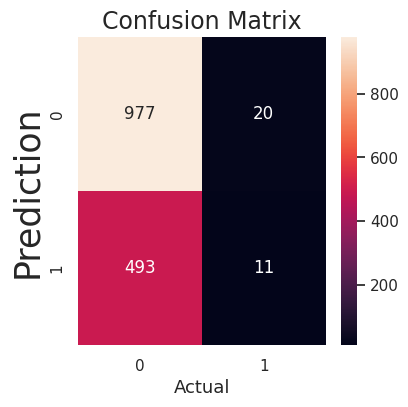

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.500882608141886


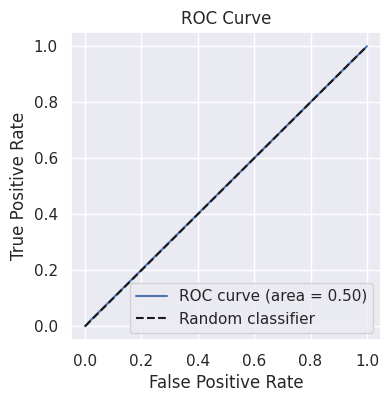

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = modelNB.predict(test_padded)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       997
           1       0.30      0.10      0.15       504

    accuracy                           0.62      1501
   macro avg       0.48      0.49      0.45      1501
weighted avg       0.54      0.62      0.55      1501



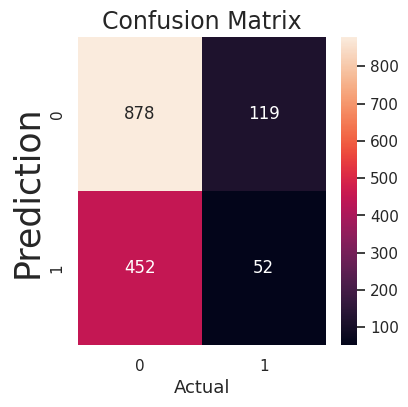

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.49190826447596764


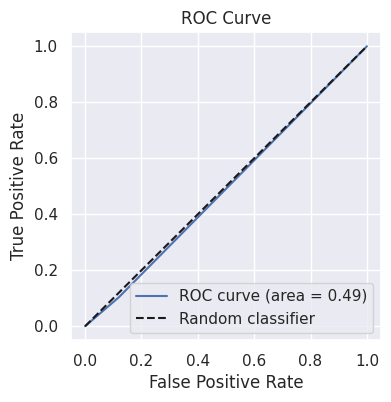

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = log_reg_model.predict(test_padded)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       997
           1       0.64      0.43      0.51       504

    accuracy                           0.73      1501
   macro avg       0.69      0.65      0.66      1501
weighted avg       0.71      0.73      0.71      1501



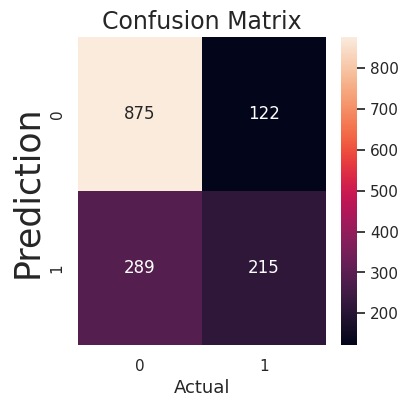

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.652110100141695


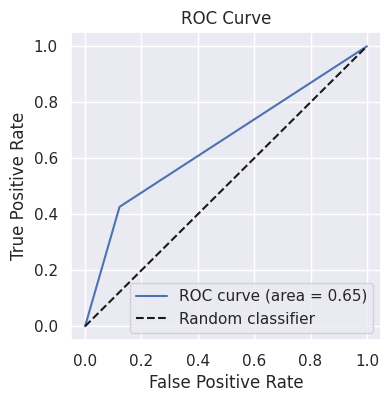

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = decision_tree_model.predict(test_padded)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       997
           1       0.56      0.65      0.61       504

    accuracy                           0.71      1501
   macro avg       0.69      0.70      0.69      1501
weighted avg       0.73      0.71      0.72      1501



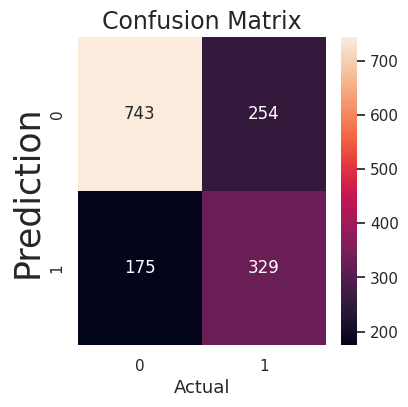

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.699006742449571


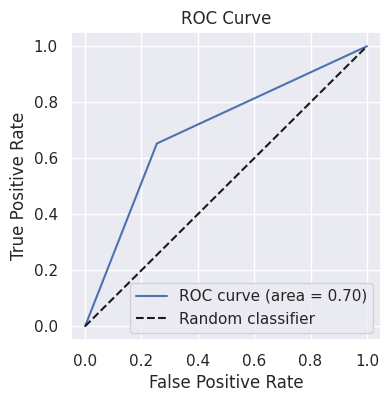

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = rf_model.predict(test_padded)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       997
           1       0.62      0.60      0.61       504

    accuracy                           0.74      1501
   macro avg       0.71      0.71      0.71      1501
weighted avg       0.74      0.74      0.74      1501



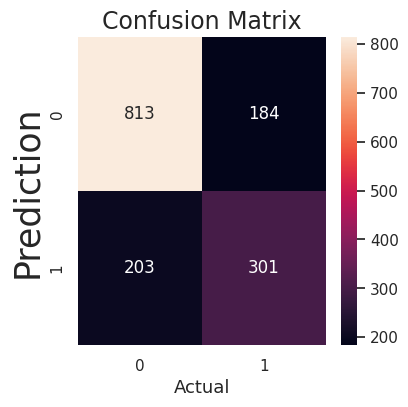

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.7063342806196368


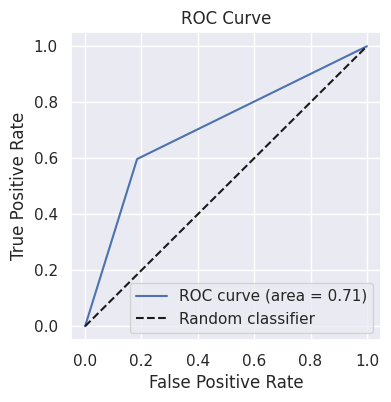

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = extra_trees_model.predict(test_padded)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       997
           1       0.63      0.59      0.61       504

    accuracy                           0.75      1501
   macro avg       0.72      0.71      0.71      1501
weighted avg       0.74      0.75      0.75      1501



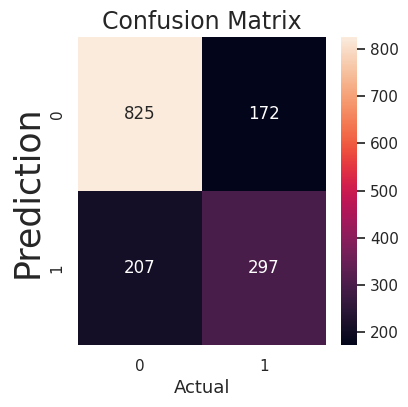

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.7083840808138703


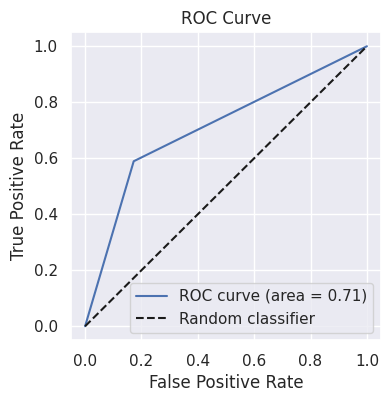

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# (6) Word-Embedding

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def cv_test(text,nrange):
    count_vec = CountVectorizer(analyzer='word', ngram_range=(nrange,nrange))
    vec_form  = count_vec.fit_transform(text).toarray()
    return count_vec,vec_form

In [ ]:
test_corpus = df1['lemma_text'].tolist()

**TF-IDF** (Term Frequency*Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv_1,emb_1  = cv_test(test_corpus,1)
cv_2,emb_2  = cv_test(test_corpus,2)
print(f"Embedding {emb_1}")
#print(f"Vocab for uni-grams{cv_1.vocabulary_}")
print(f"Embeddings {emb_2}")
#print(f"Vocab for bi-grams {cv_2.vocabulary_}")

Embedding [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Embeddings [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
def tfidf_test(text,nrange):
    t_vec = TfidfVectorizer(analyzer='word', ngram_range=(nrange,nrange))
    vec_form  = t_vec.fit_transform(text).toarray()
    return t_vec,vec_form

In [ ]:
t_vector, emb = tfidf_test(test_corpus, 1)
#print(f"TFIDF_vectorizer for uni-gram {t_vector}")
print(f"Embedding training {emb}")
#print(f"Vocab {t_vector.vocabulary_}")
print(len(emb))

tr_emb=emb[1501:]
ts_emb=emb[:1501]


print(emb)
print(len(tr_emb))
print(len(ts_emb))

Embedding training [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
6188
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4687
1501


# Applying Model after Word Embedding

I) Support Vector Classifier(SVC)

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
svc_model = SVC(kernel='poly')
svc_model.fit(tr_emb, tr_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [ ]:
test_pred1 = svc_model.predict(ts_emb)
accuracy = accuracy_score(ts_label, test_pred1)
print("SVC Accuracy: {:.2f}%".format(accuracy * 100))

SVC Accuracy: 71.62%


# II) Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Train and Evaluate Models Using TF-IDF
modelNB = MultinomialNB()
modelNB.fit(tr_emb, tr_label)


test_pred2 = modelNB.predict(ts_emb)
accuracy = accuracy_score(ts_label, test_pred2)
print("NB Accuracy: {:.2f}%".format(accuracy * 100))

NB Accuracy: 82.28%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# III) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg_model = LogisticRegression()
log_reg_model.fit(tr_emb, tr_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
test_pred3 = log_reg_model.predict(ts_emb)
accuracy = accuracy_score(ts_label, test_pred3)
print("LR Accuracy: {:.2f}%".format(accuracy * 100))

LR Accuracy: 82.68%


# IV) Decision Tree(DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(tr_emb, tr_label)

DecisionTreeClassifier(random_state=42)

In [ ]:
test_pred4 = decision_tree_model.predict(ts_emb)
accuracy = accuracy_score(ts_label, test_pred4)
print("DT Accuracy: {:.2f}%".format(accuracy * 100))

DT Accuracy: 77.02%


# V) Random Forest(RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(tr_emb, tr_label)

<ipython-input-952-8b82fbaf1887>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(tr_emb, tr_label)


RandomForestClassifier(random_state=0)

In [ ]:
test_pred5 = rf_model.predict(ts_emb)
accuracy = accuracy_score(ts_label, test_pred5)
print("RF Accuracy: {:.2f}%".format(accuracy * 100))

RF Accuracy: 83.48%


# VI) Extra Tree(ET)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the model
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(tr_emb, tr_label)

<ipython-input-954-1e5c049b629e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_model.fit(tr_emb, tr_label)


ExtraTreesClassifier(random_state=42)

In [ ]:
test_pred6 = extra_trees_model.predict(ts_emb)
accuracy = accuracy_score(ts_label, test_pred6)
print("ET Accuracy: {:.2f}%".format(accuracy * 100))

ET Accuracy: 83.74%


# **Precision, recall, F1-Score, Confusion Matrix and ROC-AUC for every model**

In [ ]:
test_prediction1 = svc_model.predict(ts_emb)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       997
           1       1.00      0.15      0.27       504

    accuracy                           0.72      1501
   macro avg       0.85      0.58      0.55      1501
weighted avg       0.80      0.72      0.64      1501



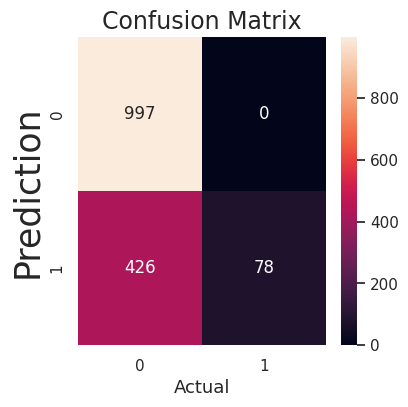

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.5773809523809523


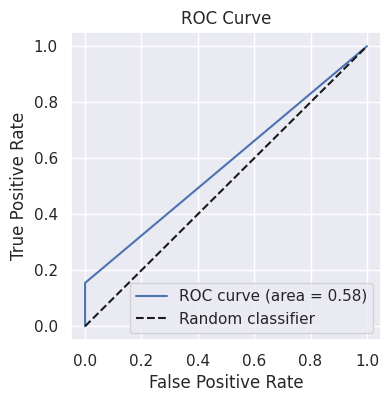

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = modelNB.predict(ts_emb)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       997
           1       0.94      0.51      0.66       504

    accuracy                           0.82      1501
   macro avg       0.87      0.74      0.77      1501
weighted avg       0.84      0.82      0.81      1501



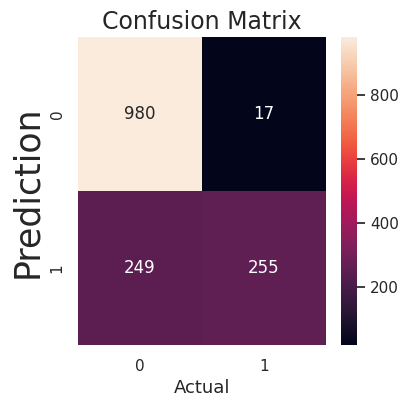

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.7444506137459999


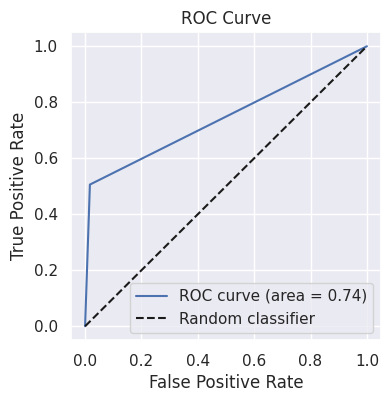

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = log_reg_model.predict(ts_emb)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       997
           1       0.83      0.61      0.70       504

    accuracy                           0.83      1501
   macro avg       0.83      0.77      0.79      1501
weighted avg       0.83      0.83      0.82      1501



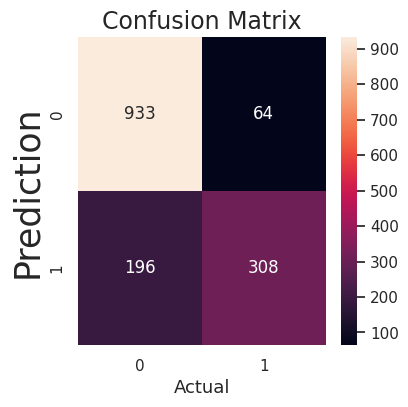

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.7734592666889558


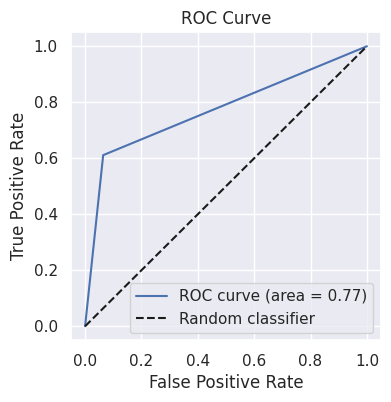

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = decision_tree_model.predict(ts_emb)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       997
           1       0.65      0.67      0.66       504

    accuracy                           0.77      1501
   macro avg       0.74      0.75      0.74      1501
weighted avg       0.77      0.77      0.77      1501



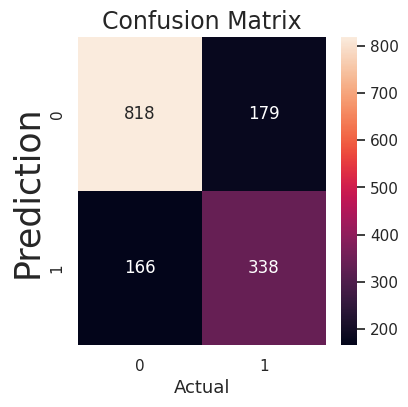

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.7455481523936889


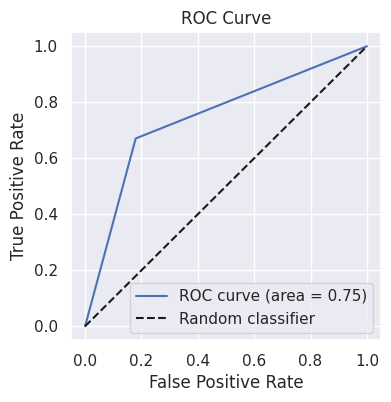

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = rf_model.predict(ts_emb)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       997
           1       0.78      0.71      0.74       504

    accuracy                           0.83      1501
   macro avg       0.82      0.80      0.81      1501
weighted avg       0.83      0.83      0.83      1501



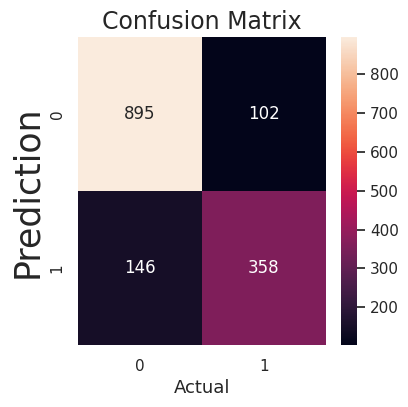

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.8040052697775868


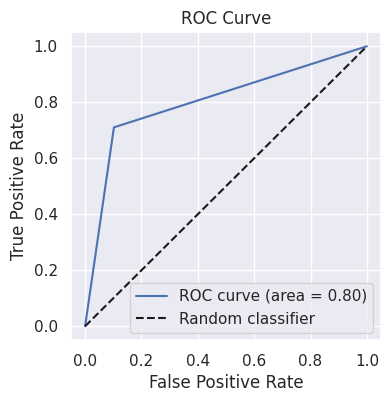

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = extra_trees_model.predict(ts_emb)
print(classification_report(ts_label, test_prediction1))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       997
           1       0.82      0.66      0.73       504

    accuracy                           0.84      1501
   macro avg       0.83      0.79      0.81      1501
weighted avg       0.84      0.84      0.83      1501



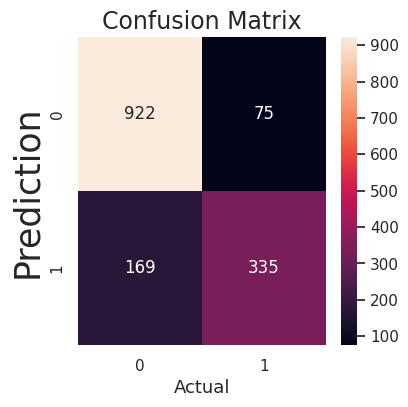

In [ ]:
cm = confusion_matrix(ts_label,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.7947284313257231


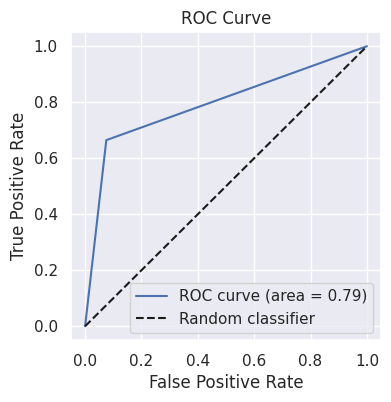

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_label, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_label, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Word2vec** embdding

In [ ]:
pip install gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
def word2vec_test(text,nrange):
    t_vec1 = Word2Vec(sentences=text, vector_size=100, window=5, min_count=1)
    vec_form1  = t_vec1.fit_transform(text).toarray()
    return t_vec1,vec_form1

In [ ]:
#t_vector, emb = word2vec_test(test_corpus, 1)
##print(f"TFIDF_vectorizer for uni-gram {t_vector}")
#print(f"Embedding training {emb1}")
##print(f"Vocab {t_vector.vocabulary_}")
#print(len(emb1))

#tr_emb1=emb1[1501:]
#ts_emb2=emb1[:1501]


#print(emb1)
#print(len(tr_emb1))
#print(len(ts_emb2))

# Lets balance the data for each classes and try it again

In [ ]:
#apply "random over sampling balancing technique"
#class count
class_count_0, class_count_1 = df1['y_toxic'].value_counts()
# Separate classes
class_0 = df1[df1['y_toxic'] == 0]
class_1 = df1[df1['y_toxic'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4116, 7)
class 1: (2072, 7)


In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

df2 = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",df2['y_toxic'].value_counts())

total class of 1 and 0: 1    4116
0    4116
Name: y_toxic, dtype: int64


In [ ]:
#Lets see after appling balancing technique
df2 = df2.sample(frac = 1)
df2.y_toxic.value_counts()


1    4116
0    4116
Name: y_toxic, dtype: int64

In [ ]:
df2.head(10)

,text,y_toxic,token_form,SWL_text,p_stem,lemma1,lemma_text
5471,tor coritro kharap,1,"[tor, coritro, kharap]","[tor, coritro, kharap]","[tor, coritro, kharap]","[tor, coritro, kharap]",tor coritro kharap
1851,sob milaiya aro 1 mas ora sob more jabe,1,"[sob, milaiya, aro, 1, mas, ora, sob, more, jabe]","[sob, milaiya, aro, 1, ora, sob, jabe]","[sob, milaiya, aro, 1, ora, sob, jabe]","[sob, milaiya, aro, 1, os, sob, jabe]",sob milaiya aro 1 os sob jabe
1650,tai apnara shara jibon joubon khomotay thakun...,1,"[tai, apnara, shara, jibon, joubon, khomotay, ...","[apnara, shara, jibon, joubon, khomotay, thaku...","[apnara, shara, jibon, joubon, khomotay, thaku...","[apnara, shara, jibon, joubon, khomotay, thaku...",apnara shara jibon joubon khomotay thakun apna...
2006,mr ganguli apnara age bangladeshe eshe khelu...,1,"[mr, ganguli, apnara, age, bangladeshe, eshe, ...","[mr, ganguli, apnara, age, bangladeshe, eshe, ...","[mr, ganguli, apnara, age, bangladesh, esh, kh...","[mr, ganguli, apnara, age, bangladesh, esh, kh...",mr ganguli apnara age bangladesh esh khelun ta...
4396,pass vule gele ki kichu korar ase,0,"[pass, vule, gele, ki, kichu, korar, ase]","[pass, vule, gele, kichu, korar, ase]","[pass, vule, gele, kichu, korar, ase]","[pas, vule, gele, kichu, korar, ase]",pas vule gele kichu korar ase
5671,balvadaimma manushjon,1,"[balvadaimma, manushjon]","[balvadaimma, manushjon]","[balvadaimma, manushjon]","[balvadaimma, manushjon]",balvadaimma manushjon
5771,colo jy kyte,0,"[colo, jy, kyte]","[colo, jy, kyte]","[colo, jy, kyte]","[colo, jy, kyte]",colo jy kyte
6143,ha ha ha ekke bare voira dise,1,"[ha, ha, ha, ekke, bare, voira, dise]","[ekke, voira, dise]","[ekk, voira, dise]","[ekk, voira, dise]",ekk voira dise
3559,dear fan ei app ti download korar por use ...,0,"[dear, fan, ei, app, ti, download, korar, por,...","[dear, app, download, korar, korar, jonno, 2, ...","[dear, app, download, korar, korar, jonno, 2, ...","[dear, app, download, korar, korar, jonno, 2, ...",dear app download korar korar jonno 2 bishoy c...
4861,bkasher cash out ar charge ta komano jai na,0,"[bkasher, cash, out, ar, charge, ta, komano, j...","[bkasher, cash, charge, komano, jai]","[bkasher, cash, charg, komano, jai]","[bkasher, cash, charg, komano, jai]",bkasher cash charg komano jai


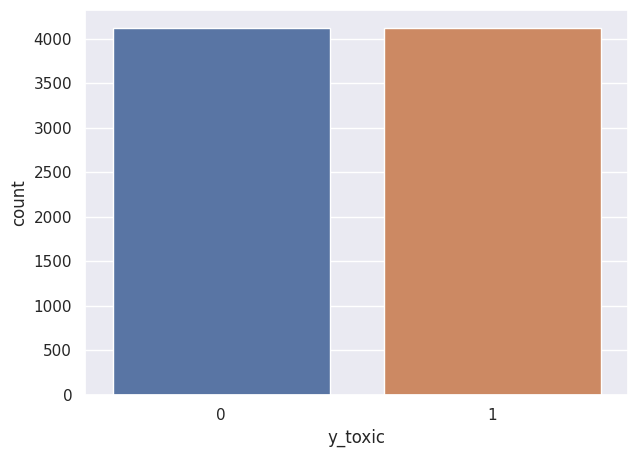

In [ ]:
# visualizing the distribution of target variable
sns.set(rc={'figure.figsize':(7,5)})
axis=sns.countplot(x='y_toxic', data = df2)

# Splitting Dataset

In [ ]:
# Initialize an empty list
labelss=[]

# Loop through the DataFrame and append each text to the list
for index, row in df2.iterrows():
    labelss.append(row['y_toxic'])

print(labelss)
print(len(labelss))

[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 

In [ ]:
labeld=[[item] for item in labelss]
list_of_labelss=np.array(labeld)

tr_lab=list_of_labelss[1501:]
ts_lab=list_of_labelss[:1501]


print(list_of_labelss)
print(len(tr_lab))
print(len(ts_lab))

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]
6731
1501


# Word Embedding For df2, after balancing data (using TF-IDF)

In [ ]:
test_corp = df2['lemma_text'].tolist()

In [ ]:
cvv_1,embb_1  = cv_test(test_corp,1)
cvv_2,embb_2  = cv_test(test_corp,2)

print(f"Embedding {embb_1}")
print(f"Embeddings {embb_2}")

Embedding [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Embeddings [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
tt_vector, embd = tfidf_test(test_corp, 1)
print(f"Embedding training {embd}")
print(len(embd))

tr_embd=embd[1501:]
ts_embd=embd[:1501]


print(len(tr_embd))
print(len(ts_embd))

Embedding training [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
8232
6731
1501


# Applying Models After Balancing data

# **SVC**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='poly')
svc_model.fit(tr_embd, tr_lab)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [ ]:
test_pre1 = svc_model.predict(ts_embd)
accuracy = accuracy_score(ts_lab, test_pre1)
print("SVC Accuracy: {:.2f}%".format(accuracy * 100))

SVC Accuracy: 93.07%


# **NB Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Train and Evaluate Models Using TF-IDF
modelNB = MultinomialNB()
modelNB.fit(tr_embd, tr_lab)


test_pre2 = modelNB.predict(ts_embd)
accuracy = accuracy_score(ts_lab, test_pre2)
print("NB Accuracy: {:.2f}%".format(accuracy * 100))

NB Accuracy: 88.21%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **LR Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg_model = LogisticRegression()
log_reg_model.fit(tr_embd, tr_lab)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
test_pre3 = log_reg_model.predict(ts_embd)
accuracy = accuracy_score(ts_lab, test_pre3)
print("LR Accuracy: {:.2f}%".format(accuracy * 100))

LR Accuracy: 86.41%


# **DT Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(tr_embd, tr_lab)

DecisionTreeClassifier(random_state=42)

In [ ]:
test_pre4 = decision_tree_model.predict(ts_embd)
accuracy = accuracy_score(ts_lab, test_pre4)
print("DT Accuracy: {:.2f}%".format(accuracy * 100))

DT Accuracy: 86.94%


# **RF Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(tr_embd, tr_lab)

<ipython-input-995-9f29dfe6ea2b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(tr_embd, tr_lab)


RandomForestClassifier(random_state=0)

In [ ]:
test_pre5 = rf_model.predict(ts_embd)
accuracy = accuracy_score(ts_lab, test_pre5)
print("RF Accuracy: {:.2f}%".format(accuracy * 100))

RF Accuracy: 89.34%


# **ET Model**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the model
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(tr_embd, tr_lab)

<ipython-input-997-89420a3414e0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_model.fit(tr_embd, tr_lab)


ExtraTreesClassifier(random_state=42)

In [ ]:
test_pre6 = extra_trees_model.predict(ts_embd)
accuracy = accuracy_score(ts_lab, test_pre6)
print("ET Accuracy: {:.2f}%".format(accuracy * 100))

ET Accuracy: 90.74%


# **Precision, recall, F1-Score, Confusion Matrix and ROC-AUC for the best model**

In [ ]:
test_prediction1 = svc_model.predict(ts_embd)
print(classification_report(ts_lab, test_prediction1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       773
           1       1.00      0.86      0.92       728

    accuracy                           0.93      1501
   macro avg       0.94      0.93      0.93      1501
weighted avg       0.94      0.93      0.93      1501



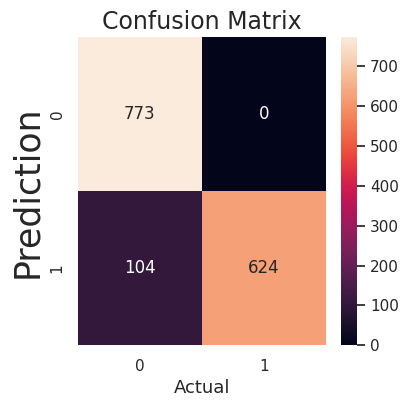

In [ ]:
cm = confusion_matrix(ts_lab,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.9285714285714286


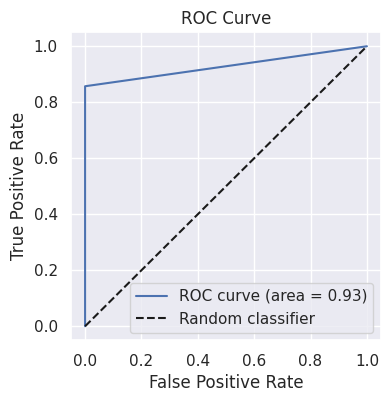

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_lab, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_lab, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = modelNB.predict(ts_embd)
print(classification_report(ts_lab, test_prediction1))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       773
           1       0.87      0.89      0.88       728

    accuracy                           0.88      1501
   macro avg       0.88      0.88      0.88      1501
weighted avg       0.88      0.88      0.88      1501



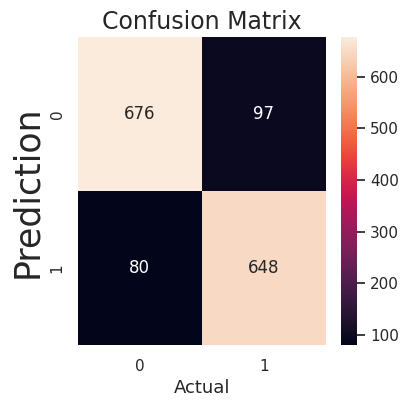

In [ ]:
cm = confusion_matrix(ts_lab,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.8823123836060447


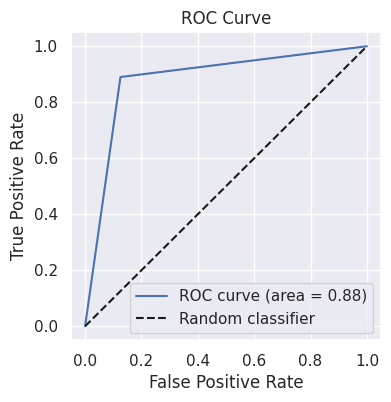

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_lab, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_lab, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = log_reg_model.predict(ts_embd)
print(classification_report(ts_lab, test_prediction1))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       773
           1       0.82      0.92      0.87       728

    accuracy                           0.86      1501
   macro avg       0.87      0.87      0.86      1501
weighted avg       0.87      0.86      0.86      1501



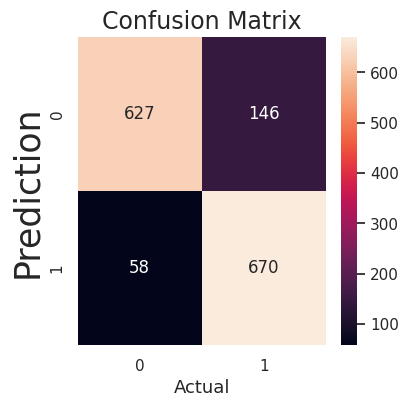

In [ ]:
cm = confusion_matrix(ts_lab,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.8657275777262841


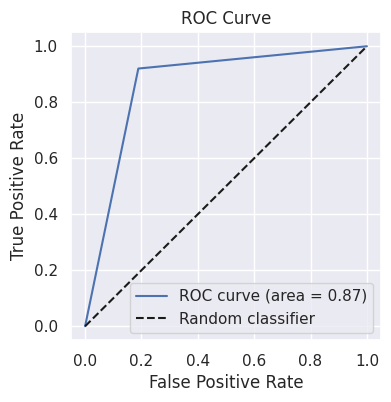

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_lab, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_lab, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = decision_tree_model.predict(ts_embd)
print(classification_report(ts_lab, test_prediction1))

              precision    recall  f1-score   support

           0       0.92      0.81      0.87       773
           1       0.82      0.93      0.87       728

    accuracy                           0.87      1501
   macro avg       0.87      0.87      0.87      1501
weighted avg       0.88      0.87      0.87      1501



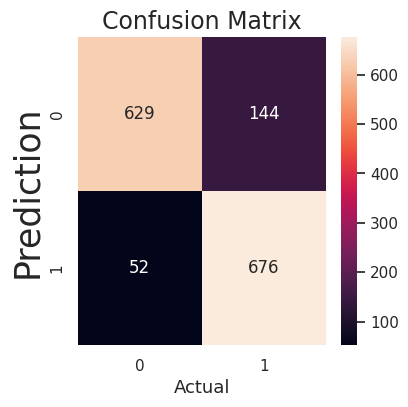

In [ ]:
cm = confusion_matrix(ts_lab,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.8711421179079653


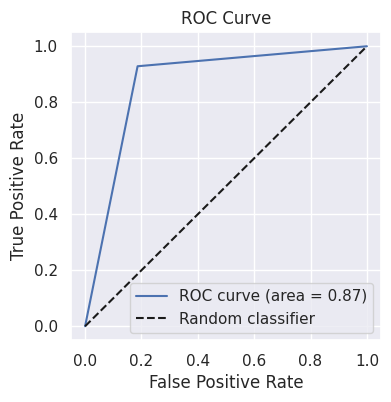

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_lab, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_lab, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = rf_model.predict(ts_embd)
print(classification_report(ts_lab, test_prediction1))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       773
           1       0.85      0.95      0.90       728

    accuracy                           0.89      1501
   macro avg       0.90      0.89      0.89      1501
weighted avg       0.90      0.89      0.89      1501



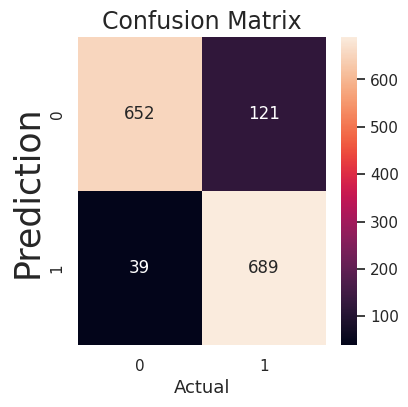

In [ ]:
cm = confusion_matrix(ts_lab,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.8949477915357605


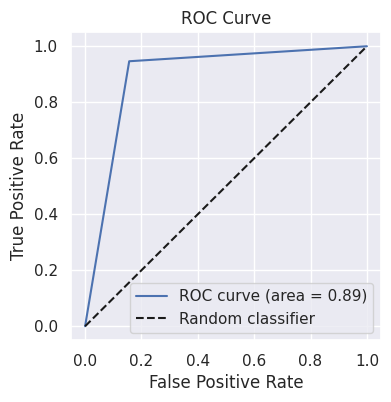

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_lab, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_lab, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_prediction1 = extra_trees_model.predict(ts_embd)
print(classification_report(ts_lab, test_prediction1))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       773
           1       0.88      0.93      0.91       728

    accuracy                           0.91      1501
   macro avg       0.91      0.91      0.91      1501
weighted avg       0.91      0.91      0.91      1501



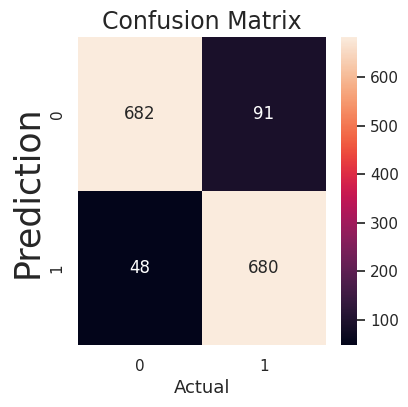

In [ ]:
cm = confusion_matrix(ts_lab,test_prediction1)

#Plot the confusion matrix.
sns.set(rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=25)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

0.9081713887664729


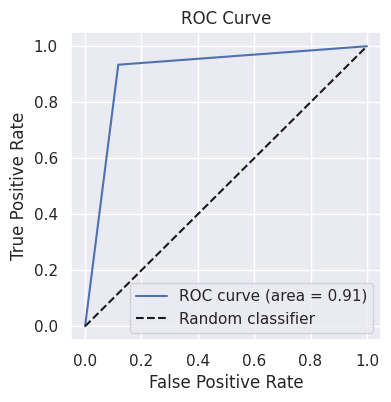

In [ ]:
# Compute the ROC AUC score
fpr, tpr, thresholds = roc_curve(ts_lab, test_prediction1, pos_label=1)
roc_auc = roc_auc_score(ts_lab, test_prediction1)
print(roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()